![slide](slide.png)

# Electron, Photon and Pion Classification

In [1]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('fivethirtyeight')

In [2]:
DATADIR = '/home/jose/work/ml-physics/data'

ELEC = 'eminus_Ele-Eta0-PhiPiOver2-Energy50.npy'
PHOT = 'gamma-Photon-Eta0-PhiPiOver2-Energy50.npy'
PION = 'piminus_Pion-Eta0-PhiPiOver2-Energy50.npy'

elec = np.load(os.path.join(DATADIR, ELEC))
phot = np.load(os.path.join(DATADIR, PHOT))
pion = np.load(os.path.join(DATADIR, PION))

In [3]:
elec_hist = np.array([np.sum(i) for i in elec])
phot_hist = np.array([np.sum(i) for i in phot])
pion_hist = np.array([np.sum(i) for i in pion])

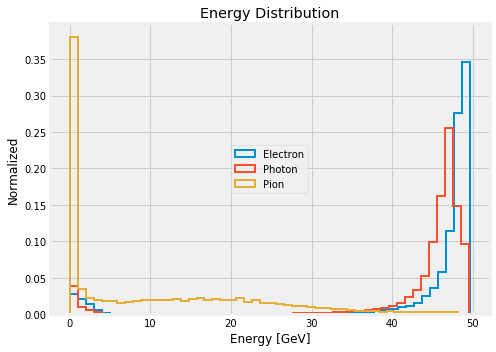

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.hist(elec_hist, bins=50, histtype='step', density=True, linewidth=2., label='Electron')
ax.hist(phot_hist, bins=50, histtype='step', density=True, linewidth=2., label='Photon')
ax.hist(pion_hist, bins=50, histtype='step', density=True, linewidth=2., label='Pion')
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('Normalized')
ax.set_title('Energy Distribution')
ax.legend(loc='center')

plt.tight_layout()
plt.savefig('energy.png');

In [5]:
elec_mean = np.mean(elec, axis=0)
phot_mean = np.mean(phot, axis=0)
pion_mean = np.mean(pion, axis=0)

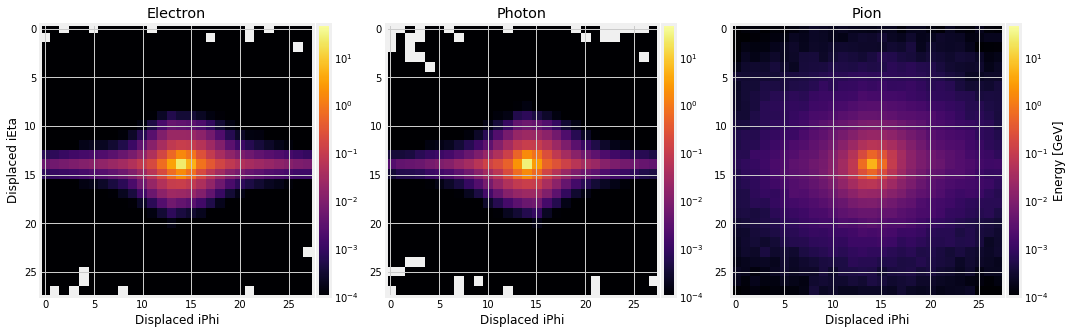

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

norm = LogNorm(vmin=0.0001, vmax=50.)

im0 = ax[0].imshow(elec_mean, cmap='inferno', norm=norm)
ax[0].set_title('Electron')
ax[0].set_xlabel('Displaced iPhi')
ax[0].set_ylabel('Displaced iEta')
cax = make_axes_locatable(ax[0]).append_axes("right", size="5%", pad=0.05)
plt.colorbar(im0, cax=cax)

im1 = ax[1].imshow(phot_mean, cmap='inferno', norm=norm)
ax[1].set_title('Photon')
ax[1].set_xlabel('Displaced iPhi')
cax = make_axes_locatable(ax[1]).append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)

im2 = ax[2].imshow(pion_mean, cmap='inferno', norm=norm)
ax[2].set_title('Pion')
ax[2].set_xlabel('Displaced iPhi')
cax = make_axes_locatable(ax[2]).append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax, label='Energy [GeV]')

plt.tight_layout()
plt.savefig('image.png');

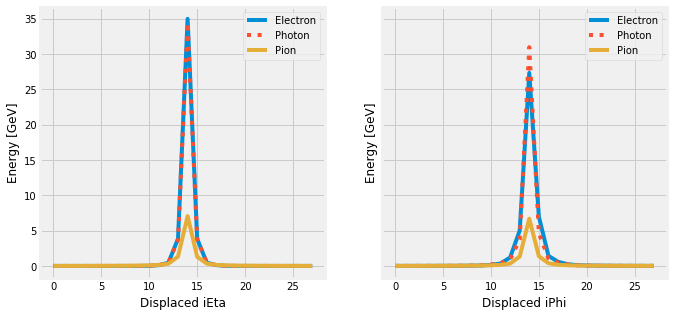

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ax[0].plot(np.sum(elec_mean, axis=1), linestyle='-', label='Electron')
ax[0].plot(np.sum(phot_mean, axis=1), linestyle=':', label='Photon')
ax[0].plot(np.sum(pion_mean, axis=1), linestyle='-', label='Pion')
ax[0].set_xlabel('Displaced iEta')
ax[0].set_ylabel('Energy [GeV]')
ax[0].legend()

ax[1].plot(np.sum(elec_mean, axis=0), linestyle='-', label='Electron')
ax[1].plot(np.sum(phot_mean, axis=0), linestyle=':', label='Photon')
ax[1].plot(np.sum(pion_mean, axis=0), linestyle='-', label='Pion')
ax[1].set_xlabel('Displaced iPhi')
ax[1].set_ylabel('Energy [GeV]')
ax[1].legend();

# Energy Regression

In [8]:
DATA = 'eplus_Ele-Eta0PhiPiOver2-Energy20to100_V2.npy'
data = np.load(os.path.join(DATADIR, DATA))

LABELS = 'eplus_Ele-Eta0PhiPiOver2-Energy20to100_V2.txt'
labels = np.loadtxt(os.path.join(DATADIR, LABELS))

In [9]:
data_mean = np.mean(data, axis=0)

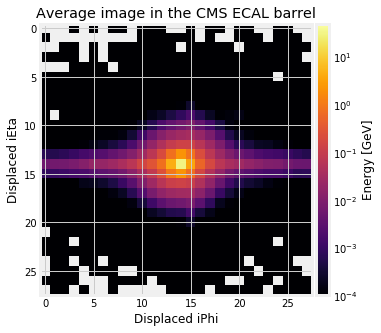

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

norm = LogNorm(vmin=0.0001, vmax=50.)

img = ax.imshow(data_mean, cmap='inferno', norm=norm)
ax.set_title('Average image in the CMS ECAL barrel')
ax.set_xlabel('Displaced iPhi')
ax.set_ylabel('Displaced iEta')
cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.05)
plt.colorbar(img, cax=cax, label='Energy [GeV]')
plt.savefig('avg_image.png');

In [11]:
data_hist = np.array([np.sum(i) for i in data])

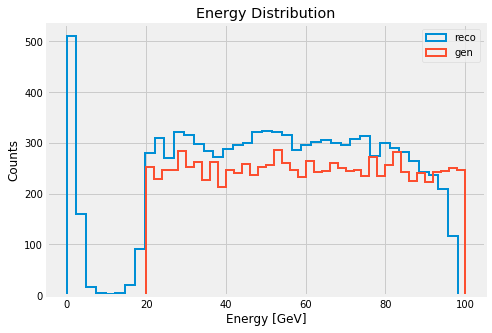

In [12]:
plt.figure(figsize=(7,5))
plt.hist(data_hist, bins=40, histtype='step', linewidth=2., label='reco')
plt.hist(labels, bins=40, histtype='step', linewidth=2., label='gen')
plt.xlabel('Energy [GeV]')
plt.ylabel('Counts')
plt.title('Energy Distribution')
plt.legend()
plt.savefig('gen_energy.png');

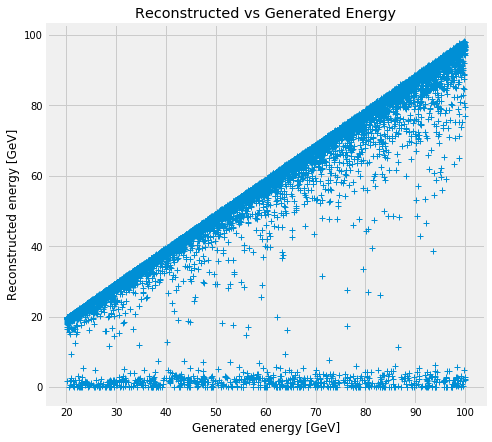

In [13]:
plt.figure(figsize=(7,7))
plt.plot(labels, data_hist, '+')
plt.title('Reconstructed vs Generated Energy')
plt.xlabel('Generated energy [GeV]')
plt.ylabel('Reconstructed energy [GeV]')
plt.savefig('reco_vs_gen_energy.png');

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

ENERGY_NORM_FACTOR = 100.

rmse = sqrt(mean_squared_error(labels, data_hist))/ENERGY_NORM_FACTOR

print(f'Root Mean Squared Error: {rmse:.4f}')

Root Mean Squared Error: 0.1712
